# セッション1: 情報理論の基礎と応用

このノートブックでは、情報理論の主要な概念である**情報量**, **エントロピー**, **KLダイバージェンス**について数式とPythonコードを通して直感的に理解を深めます。

## 目標
- 情報量が確率とどのような関係にあるかを理解する
- 離散エントロピーとその最大・最小の意味を確認する
- KLダイバージェンスがどのような「距離」なのかを実感する


## 問題1: 情報量の性質と可視化

情報量 $ I(x) = - \log_2 p(x) $ は、事象の起こりにくさを定量化した指標です。  
以下では、確率 $ p \in (0, 1] $ に対して情報量をグラフ化し、低い確率が高い情報量に対応することを確認しましょう。


C:\Users\tokei\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 24773 (\N{CJK UNIFIED IDEOGRAPH-60C5}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\tokei\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 22577 (\N{CJK UNIFIED IDEOGRAPH-5831}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\tokei\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 37327 (\N{CJK UNIFIED IDEOGRAPH-91CF}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\tokei\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 12392 (\N{HIRAGANA LETTER TO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\tokei\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 30906 (\N{CJK UNIFIED IDEOGRAPH-78BA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw

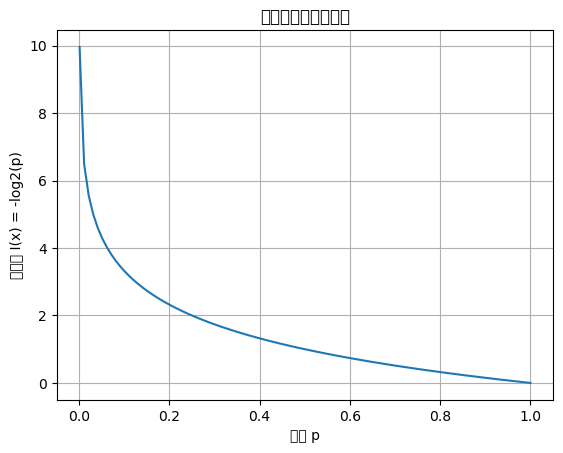

In [1]:
import numpy as np
import matplotlib.pyplot as plt

p = np.linspace(0.001, 1, 100)
info = -np.log2(p)

plt.plot(p, info)
plt.xlabel("確率 p")
plt.ylabel("情報量 I(x) = -log2(p)")
plt.title("情報量と確率の関係")
plt.grid()
plt.show()

# 情報量が最大となるのは、p = ____ のとき
# 情報量が最小となるのは、p = ____ のとき


In [2]:
print("最大情報量の確率 p =", p[np.argmax(info)])
print("最小情報量の確率 p =", p[np.argmin(info)])


最大情報量の確率 p = 0.001
最小情報量の確率 p = 1.0


## 問題2: エントロピー最大化の直感

エントロピー $ H(p) = -\sum p(x) \log_2 p(x) $ は「平均的な情報量」を意味します。  
等確率（最も不確実）な分布と、偏った（確定的）分布を比較し、エントロピーがどう変化するかを確認しましょう。


In [3]:
def entropy(p):
    return -np.sum(p * np.log2(p + 1e-12))

# 等確率な分布（最大エントロピー）
p_uniform = np.array([0.25, 0.25, 0.25, 0.25])

# 偏った分布（最小エントロピーに近い）
p_biased = np.array([0.97, 0.01, 0.01, 0.01])

print("等確率分布のエントロピー =", entropy(p_uniform))
print("偏った分布のエントロピー =", entropy(p_biased))

# TODO: 等確率分布の方がエントロピーが ____ くなる理由を考察せよ


等確率分布のエントロピー = 1.9999999999942293
偏った分布のエントロピー = 0.2419407328474401


## 問題3: KLダイバージェンスの直感

KLダイバージェンスは、真の分布 \( p \) と予測分布 \( q \) の「ずれ」を測る非対称な指標です：

\[
\mathrm{KL}(p || q) = \sum p(x) \log\left(\frac{p(x)}{q(x)}\right)
\]

以下のコードを完成させて、\( KL(p||q) \) を実装し、2つのケースを比較してください。


In [4]:
def kl_divergence(p, q):
    return np.sum(p * np.log2(p / q))

p = np.array([0.4, 0.6])
q1 = np.array([0.5, 0.5])  # 少しずれた予測
q2 = np.array([0.9, 0.1])  # 大きくずれた予測

kl1 = kl_divergence(p, q1)
kl2 = kl_divergence(p, q2)

print("KL(p || q1) =", kl1)
print("KL(p || q2) =", kl2)

# q1 と q2 のどちらが p に近い？そのとき KL ダイバージェンスは ____ くなる。


KL(p || q1) = 0.029049405545331364
KL(p || q2) = 1.0830074998557686


In [2]:
import psutil

mem = psutil.virtual_memory()

print(f"Total     : {mem.total / (1024 ** 3):.2f} GB")
print(f"Available : {mem.available / (1024 ** 3):.2f} GB")
print(f"Used      : {mem.used / (1024 ** 3):.2f} GB")
print(f"Free      : {mem.free / (1024 ** 3):.2f} GB")
print(f"Usage     : {mem.percent} %")


Total     : 7.92 GB
Available : 1.39 GB
Used      : 6.53 GB
Free      : 1.39 GB
Usage     : 82.5 %
